In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [246]:
data = pd.read_csv("housePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [248]:
def exchange(name):
    list = []
    for i in data[name]:
        if i  == True:
            list.append(1)
        if i == False:
            list.append(0)
    data[name] = list
        
exchange("Parking")
exchange("Warehouse")
exchange("Elevator")

In [252]:
data[data["Area"] == ' 3,310,000,000 ']

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
570,"3,310,000,000",2,1,1,1,Ostad Moein,3.310000e+09,110333.33


In [254]:
data.drop(570,axis = 0,inplace = True)

In [258]:
data[data["Area"] == ' 16,160,000,000 ' ]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
709,"16,160,000,000",3,1,1,1,Pasdaran,1.616000e+10,538666.67


In [260]:
data.drop(709,axis = 0,inplace = True)

In [264]:
data[data["Area"] == ' 1,000 ']

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
807,"1,000",2,1,1,0,Damavand,7.000000e+09,233333.33


In [266]:
data.drop(807,axis = 0,inplace = True)

In [270]:
data[data["Area"] == ' 8,400,000,000 ']

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1604,"8,400,000,000",2,1,1,1,Gheitarieh,8.700000e+09,290000.0


In [272]:
data.drop(1604,axis = 0,inplace = True)

In [276]:
data[data["Area"] == ' 3,600 ']

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2171,"3,600",2,0,0,0,Shahryar,9.720000e+09,324000.0


In [278]:
data.drop(2171,axis = 0,inplace = True)

In [282]:
data[data["Area"] == ' 2,550,000,000 ']

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2802,"2,550,000,000",2,1,1,1,Central Janatabad,2.550000e+09,85000.0


In [284]:
data.drop(2802,axis = 0,inplace = True)

In [292]:
list2 = []
for i in data["Area"]:
    list2.append(int(i))

data["Area"] = list2

In [298]:
new_data = data[["Area","Room","Parking","Warehouse","Elevator","Price"]]
new_data.head()

,Area,Room,Parking,Warehouse,Elevator,Price
0,63,1,1,1,1,1.850000e+09
1,60,1,1,1,1,1.850000e+09
2,79,2,1,1,1,5.500000e+08
3,95,2,1,1,1,9.025000e+08
4,123,2,1,1,1,7.000000e+09


In [296]:
new_data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000


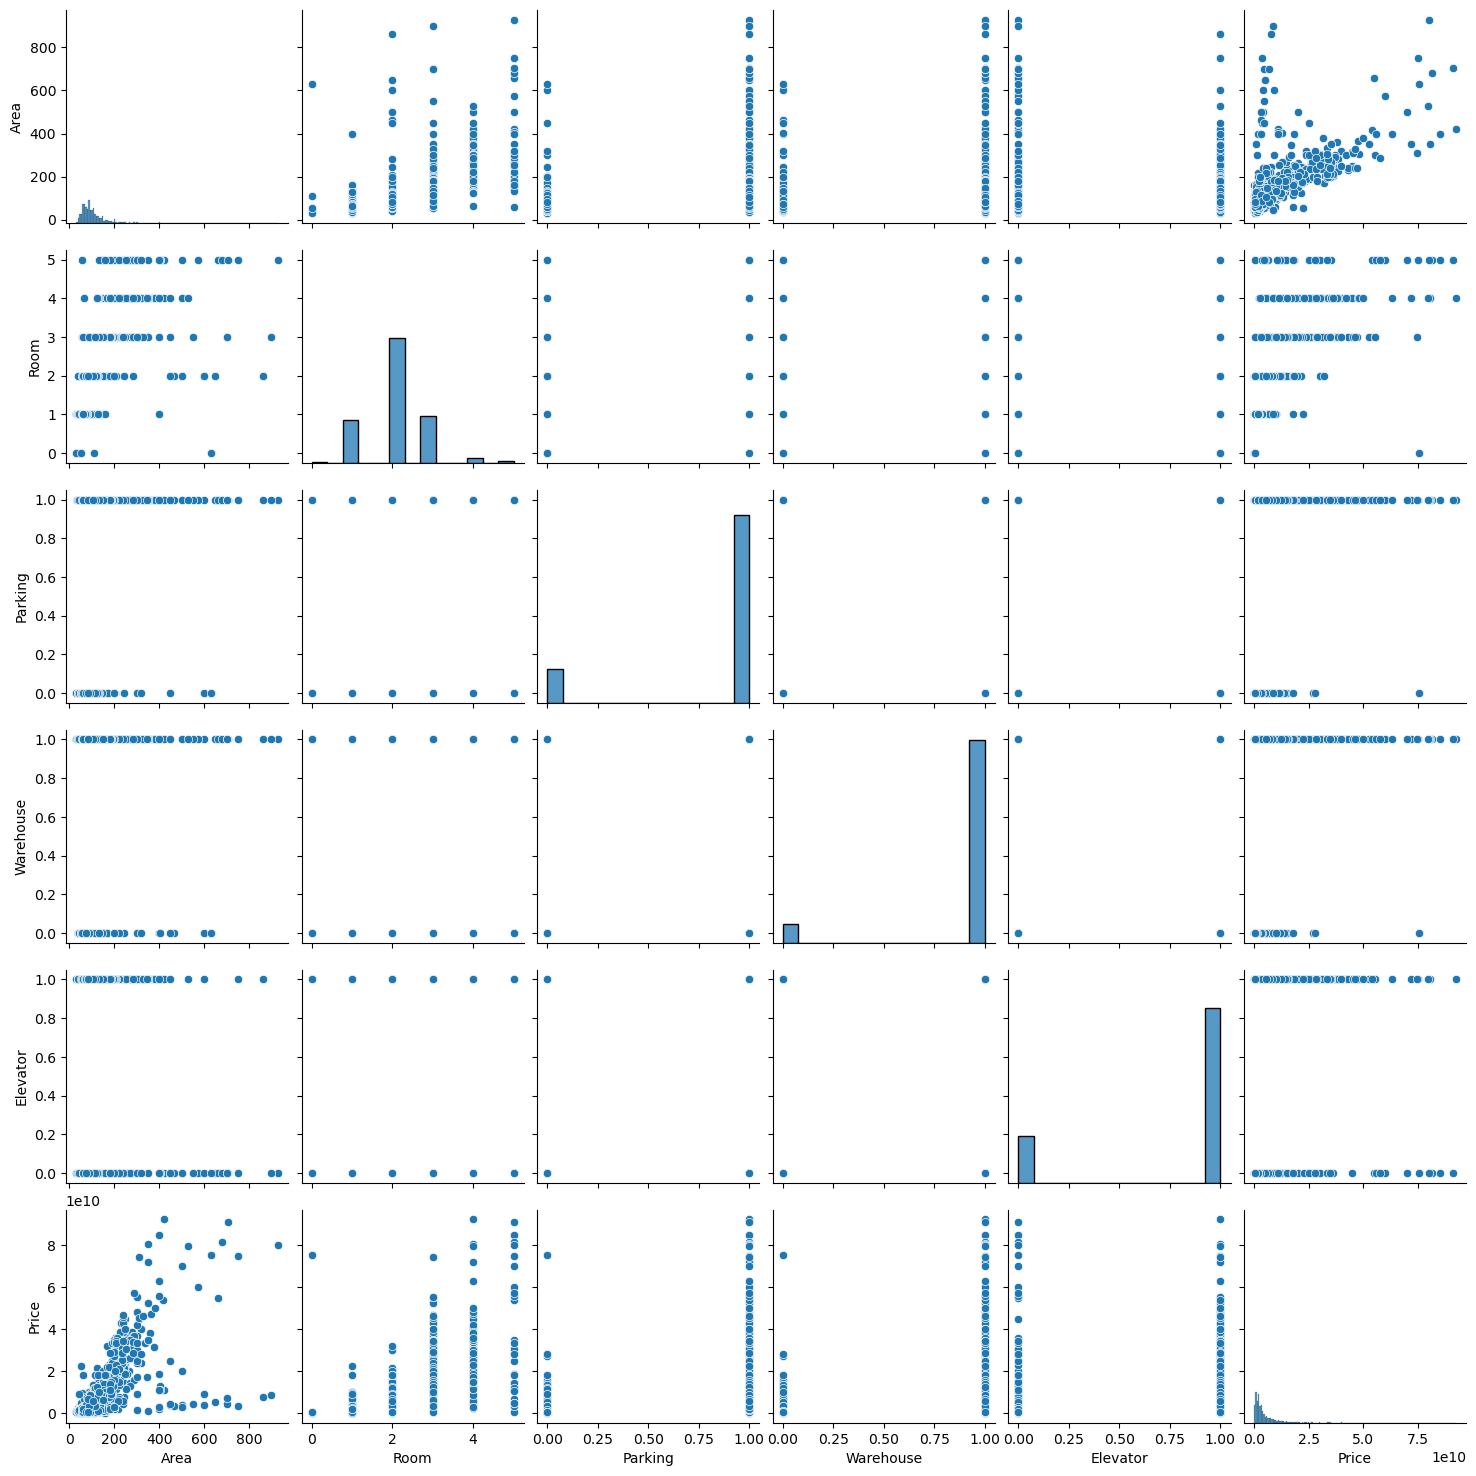

In [300]:
sns.pairplot(new_data)

In [302]:
x = data[["Area","Room","Parking","Warehouse","Elevator"]]
y = data["Price"]

In [304]:
train_x,test_x,train_y,test_y = tts(x,y,test_size = 0.35)

In [308]:
regr = LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

In [312]:
a = regr.coef_
a

array([ 8.06864019e+07,  1.05906480e+09, -2.41363386e+08,  1.55055750e+09,
        7.92366810e+08])

In [314]:
b = regr.intercept_
b

-7267952773.894402

In [318]:
pd.DataFrame(regr.coef_,x.columns)

,0
Area,8.068640e+07
Room,1.059065e+09
Parking,-2.413634e+08
Warehouse,1.550557e+09
Elevator,7.923668e+08


In [324]:
predictions = regr.predict(test_x)
predictions

array([ 8.50003480e+09,  1.88740965e+09, -1.43017858e+09, ...,
        3.89076831e+09,  2.61428309e+09,  3.97145471e+09])

In [326]:
np.array(test_y)

array([1.110e+10, 1.380e+09, 1.620e+09, ..., 1.978e+09, 2.800e+09,
       4.780e+09])

Text(0, 0.5, 'predictions')

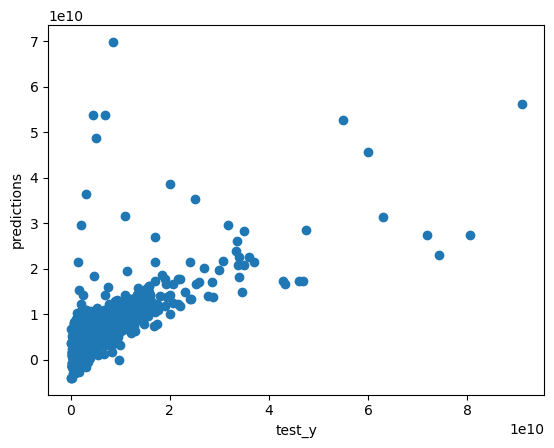

In [328]:
plt.scatter(test_y,predictions)
plt.xlabel("test_y")
plt.ylabel("predictions")

camparison beetwen PRICE and PRICE(USD):

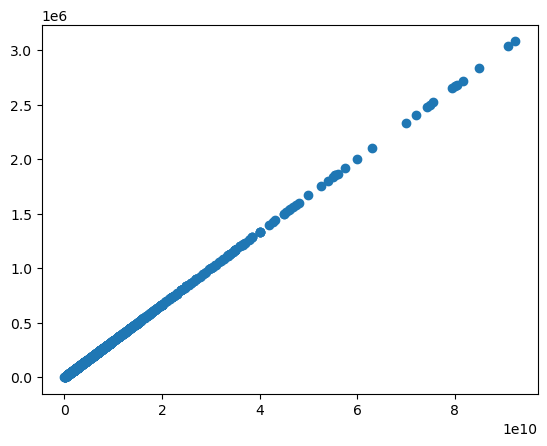

In [334]:
plt.scatter(data["Price"],data["Price(USD)"])

In [336]:
new_data2 = data[["Price","Price(USD)"]]
new_data2

,Price,Price(USD)
0,1.850000e+09,61666.67
1,1.850000e+09,61666.67
2,5.500000e+08,18333.33
3,9.025000e+08,30083.33
4,7.000000e+09,233333.33
...,...,...
3474,3.500000e+09,116666.67
3475,6.800000e+09,226666.67
3476,3.650000e+08,12166.67
3477,5.600000e+09,186666.67


In [338]:
new_data2.corr()

,Price,Price(USD)
Price,1.0,1.0
Price(USD),1.0,1.0


In [371]:
for i in data["Price"]:
    for j in data["Price(USD)"]:
        print(j / i)
        break
    break

3.333333513513513e-05


# Guessing the house price:

In [373]:
area = eval(input("Enter the area of the house you looking for: "))
room = eval(input("Enter the number of rooms in the house you are looking for"))
parking = input("does the house have parking?\n1- Yes\n2-No\n")
warehouse = input("does the house have warehouse?\n1- Yes\n2-No\n")
elevator = input("does the house have elevator?\n1- Yes\n2-No\n")
parking2 = 0
warehouse2 = 0
elevator2 = 0

if parking == "Yes":
    parking2 = 1
elif parking == "No":
    pass

if warehouse == "Yes":
    warehouse2 = 1
elif warehouse == "No":
    pass

if elevator == "Yes":
    elevator2 = 1
elif elevator == "No":
    pass



price_Rial = (80686400 * area) + (1059065000 * room) + (-241363400 * parking2) + (1550557000 * warehouse2) + (792366800 * elevator2)
price_Dollar =0.00003333333513513513 * price_Rial

print(f"It's price is {price_Rial} Rials and {price_Dollar} Dollars")

Enter the area of the house you looking for:  100
Enter the number of rooms in the house you are looking for 3
does the house have parking?
1- Yes
2-No
 Yes
does the house have warehouse?
1- Yes
2-No
 Yes
does the house have elevator?
1- Yes
2-No
 Yes


It's price is 13347395400 Rials and 444913.20404936105 Dollars
